In [23]:
import pandas as pd
import numpy as np
import pydotplus

from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.externals.six import StringIO  

from IPython.display import IFrame
from IPython.display import Image

In [29]:
data = pd.read_csv("data/phishing.csv", sep=";",header = 0, index_col = None,)

In [30]:
#del data['URL_of_Anchor']
data.describe()


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
data_array = data.values
data_columns = data.columns.get_values()

In [6]:
len(data)

11055

In [50]:
samples = data_array[:,:-1]
labels = data_array[:, -1]

# Separate the training and testing data
trainData = samples[:7000]
trainTarget = labels[:7000]
testData = samples[7000:]
testTarget = labels[7000:]

In [33]:

treemodel = tree.DecisionTreeClassifier(max_depth=2)
treemodel.fit(trainData, trainTarget)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
import graphviz 
dot_data = tree.export_graphviz(treemodel, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("phising") 

'phising.pdf'

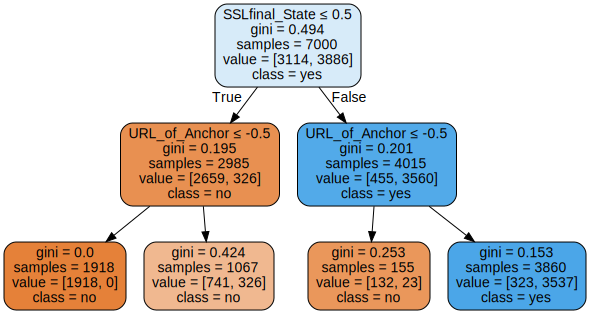

In [42]:
dot_data = tree.export_graphviz(treemodel, out_file=None, 
                      feature_names=data_columns[:-1],  
                      class_names=['no','yes'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [154]:
#graph.write_pdf("tree.pdf")
#graph.write_png("tree.png")

In [53]:
testing = treemodel.predict(testData)
print(accuracy_score(testTarget, testing))

0.9102342786683107


In [52]:
# predict

# output confusion matrix
cm = confusion_matrix(test_outputs, testing)
print("Confusion matrix:\n",cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print("Accuracy calculated from the training set = %.3f" % (accuracy))

print(classification_report(test_outputs, testing, target_names=['no', 'yes']))

Confusion matrix:
 [[1634  150]
 [ 214 2057]]
Accuracy calculated from the training set = 0.910
              precision    recall  f1-score   support

          no       0.88      0.92      0.90      1784
         yes       0.93      0.91      0.92      2271

   micro avg       0.91      0.91      0.91      4055
   macro avg       0.91      0.91      0.91      4055
weighted avg       0.91      0.91      0.91      4055



<h3>Conclusion</h3>
